# Bayesian inference

Bayesian inference is the process of deducing properties of a probability distribution from data using Bayes’ theorem. It incorporates the idea that probability should include a measure of **belief** about a prediction or outcome.


Bayesian inference is a method of statistical inference in which probability is used to *update beliefs* about model's parameters based on available *evidence or data*.

**Group task 1:**

To better understand the role of prior <font color='purple'>`beliefs and subjective probability`</font>, discuss with your neighbour the following questions:


- What is the probability that it will rain tomorrow?
- What is the probability that the next president will be a woman?
- What is the probability that aliens built the pyramids?

How do these questions compare to the probability that a die will roll a 6?

Such questions, unlike the die, cannot be answered by "long-run" probability, i.e., probability obtained from multiple repeated runs of the same experiment. A certain degree of <font color='purple'>`belief`</font> 💭 is involved.

<font color='purple'>`Priors`</font> 💭 and "subjective" probability are foundational for Bayesian inference!

## Bayes theorem

_Note: Conditional probability is the axis on which Bayesian statistics turns! If you skipped this section in the first part of the practical and need a refresher on joint and conditional probabilities, go back to that bit of the prac to make sure you are ready for the phenomenon of Bayes' Theorem!_

From the joint and conditional formulae, we can relate two conditional probabilities:

\begin{equation}
p(B \mid A) = \frac{p(A \mid B) p(B)}{p(A)}
\end{equation}

This is the same equation you have already explored...

...but with a slightly different interpretation.

**The famous Bayes Theorem!** 😻

Why is it so famous? Well let's understand what it means and gives us first!



## Prior, likelihood, posterior

Bayes' Theorem is commonly seen in machine learning and other models using <font color='red'>`data or evidence`</font> $\mathcal{D}$ and <font color='purple'>`parameters`</font> $\theta$ as:

\begin{equation}
p(\theta \mid \mathcal{D}) = \frac{p(\mathcal{D} \mid \theta)p(\mathcal{\theta})}{p(D)}
\end{equation}

* The denominator $p(\mathcal{D})$ is often called a *normaliser* or <font color='red'>`evidence`</font> .
* $p(\mathcal{\theta})$ is the <font color='purple'>`prior`</font> .
* $p(\mathcal{D} \mid \theta)$ is the <font color='teal'>`likelihood`</font> .
* and $p(\theta \mid \mathcal{D})$ is the <font color='pink'>`posterior`</font>.

For this reason, you will often see Bayes rule summarised as "<font color='pink'>`posterior`</font> $\propto$ <font color='purple'>`prior`</font> $\times$ <font color='teal'>`likelihood`</font> ", which ignores the denominator since it is a constant (independent of $\mathcal{D}$). This posterior summarises our belief state about the possible values of $\theta$.

**Group task 2:** _Switch $A$ and $B$ in $
p(B \mid A) = \frac{p(A \mid B)p(B)}{p(A)}$ and label what is the posterior, likelihood, prior and evidence in the new equation. Explain what each means to each other a few times to be sure you know what goes where! _Often the literature will refer to these 'labels' and require you know them already, so while they might seem arbitrary this memorisation task goes a long way to making your life easier in practice!_

## Diagnosing cause of headache

Imagine a situation where you need make a decision concerning your health. You have a headache, and can choose between two doctors:

**Doctor 1:**
- Has a mental model for the cause of pain.
- Performs tests.

**Doctor 2:**
- Has a mental model for the cause of pain.
- Has access to the patient's chronic history.
- Performs tests.

Which doctor do you choose? Can you make sense of which parts are the <font color='red'>`data`</font>, <font color='teal'>`likelihood`</font> and <font color='purple'>`prior`</font> in this scenario?

Inference without priors is like a doctor who does not know the patient's history!

## Diagnosing COVID-19

**Group task 3:** We know that the probability of having fever this time of the year is 10%, the probability of having COVID is 7%, and among all people who have COVID, 70% of them have fever.

If you're a doctor, you don't know whether someone has COVID until you test them, but they may present with a high temperature and you want to reason whether to isolate them on that basis! So you are interested in knowing the chance that someone has COVID given they have a high temperature.

Find the probability that a patient has COVID given they have high temperature (fever).


## Chosing the prior distribution

In the doctor example, if the doctor we go to has access to history, but only from when the patient was a child and not for their recent years as an adult, they might make the wrong inferences about the current cause of a headache. For example, if they don't know that the patient was in a car accident last month and banged their head, they could get the cause of the headache very wrong! 🥴

The choice of the  <font color='purple'>`prior`</font> 💭 is really important! It can depend on a few things:

- Type of distribution (we will see this in a second)
- Hyperparameters/hyperpriors
- Often there is a 'natural' candidate for prior choice
- Whether it creates a posterior that is mathematically solvable or not
- Some do (conjugate <font color='purple'>`prior`</font>)
- Most do not (non-conjugate)...

## The influence of prior

Let us explore how much <font color='purple'>`priors`</font>  can actually influence the posterior. Since tha marginal distribution $p(y)$ does not depend on the parameters, we will only explore the posterior up the to proportionality term.

$$p(\theta |y ) ∝ p(y| \theta) p(\theta).$$

If we have access to point-wise evaluations of the <font color='teal'>`likelihood`</font> $p(y | \theta)$ and prior $p(\theta)$, we can compute their product to obtain this posterior.

Consider the coin tossing problem, which we describe using the Bernoulli distribution for a single trial, and the product of Bernoullis for multiple trials. When we compute a <font color='teal'>`likelihood`</font> by multiplying independent Bernoulli trials, this is like a *permutation* in so far as the *order* of the tosses matters.

Another formulation for a repeated Bernoulli random variable is to consider the _proportion_ of correct trials without considering order. We can normalise for this using the formula for combinations, which you may know of as "$n$ choose $k$." This lets us define a random variable on the number of succeses in $n$ trials called a **Binomial random variable**.

Let's say that out of
$$n=10$$
tosses we obtained
$$h=6$$
successes.

Let's consider: what is the probability of "success" for this coin? We'll simulate some examples using a binomial random variable.

**[Optional]:** *Show that the <font color='teal'>`likelihood`</font> for coin tosses calculated using independent Bernoulli random variables (a Bernoulli process) is proportional (up to a constant) to the likelihood for coin tosses calculated using a Binomial random variable.*

In [8]:
import jax.numpy as jnp

import numpyro.distributions as dist

import matplotlib.pyplot as plt

In [9]:
##############################################
# prior x likelihood = posterior
##############################################

h=6
n=9
p=h/n

# define grid
grid_points=100

# define regular grid in the (0,1) interval
p_grid = jnp.linspace(0, 1, grid_points)

# compute likelihood at each point in the grid
log_prob_likelihood = dist.Binomial(n, probs=p_grid).log_prob(h)

# normalize likelihood to get the likelihood PMF
likelihood_pmf = jnp.exp(log_prob_likelihood - jnp.max(log_prob_likelihood)) / jnp.sum(jnp.exp(log_prob_likelihood - jnp.max(log_prob_likelihood)))

In [10]:
def computePosterior(likelihood, prior):
    # this functionm computes posterior
    # and plots the result

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize posterior
    posterior = unstd_posterior / unstd_posterior.sum()

    plt.figure(figsize=(17, 3))
    ax1 = plt.subplot(131)
    ax1.set_title("Prior")
    ax1.grid(0.3)
    plt.plot(p_grid, prior,color='purple')

    ax2 = plt.subplot(132)
    ax2.set_title("Likelihood")
    ax2.grid(0.3)
    plt.plot(p_grid, likelihood,color='teal')

    ax3 = plt.subplot(133)
    ax3.set_title("Posterior")
    plt.plot(p_grid, posterior,color='gray')
    ax3.grid(0.3)
    plt.show()

    return

### Prior 1 - Uniform

Our first <font color='purple'>`prior`</font> will be a Uniform distribution:

$$p(\theta) = 1.$$

This means we don't think the coin is likely to be weighted or not: the probability of heads could take any value between 0 and 1 equally.

This is the same as not having a prior at all! So we should expect the likelihood and posterior distributions to look the same (if that isn't intuitive to you, speak to a tutor).

Run the code cell below to confirm your intuitions.

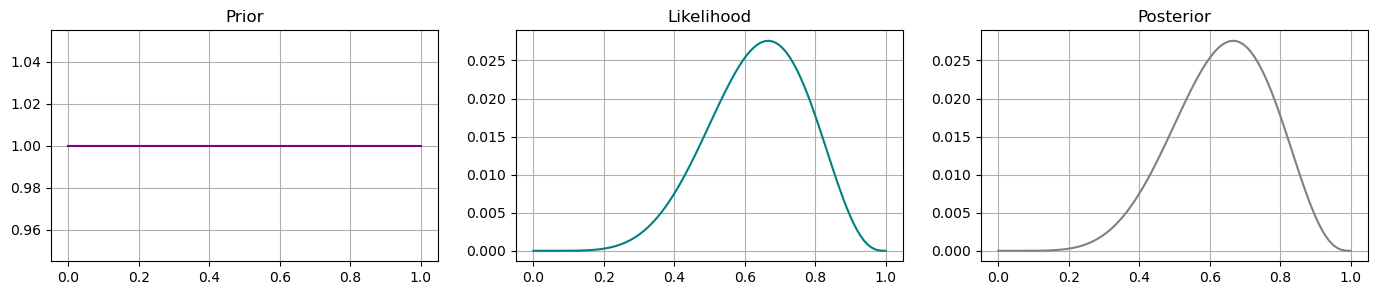

In [11]:
# Uniform prior
prior1 = jnp.repeat(1, grid_points)

# visualise prior, likelihood, posterior
posterior1 = computePosterior(likelihood_pmf, prior1)

### Prior 2 - step function

Perhaps we are pretty sure that heads is more likely than tails i.e. the coin is weighted, but we don't know by how much.

We could set this up as a step-function where the probability is 0 below a certain value, and uniform after.

**Code task B4**: Implement the step-function prior:

$$p(\theta) = 1.$$

$$
p(\theta) = \begin{cases}
0 \text{ if } \theta <= 0.5 \\
1 \text{ otherwise. }
\end{cases}
$$

How do you think the posterior will change? Sketch the prior to give yourself some intuition!

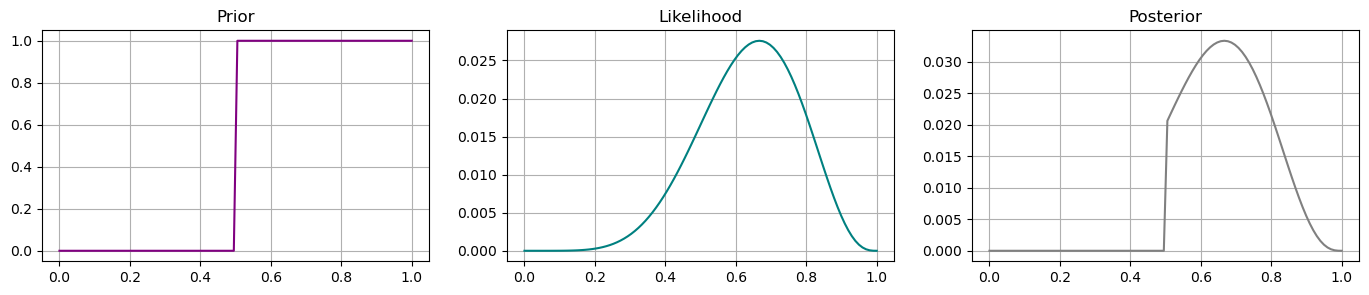

In [14]:
prior2 = (p_grid >= 0.5).astype(int)
posterior2 = computePosterior(likelihood_pmf, prior2)


### Prior 3

Let's imagine some prior that is centered at 0.5, and decays (exponentially) on either side. Run the below code and validate that this prior looks like you would expect, and shifts the likelihood to the posterior as you would expect.

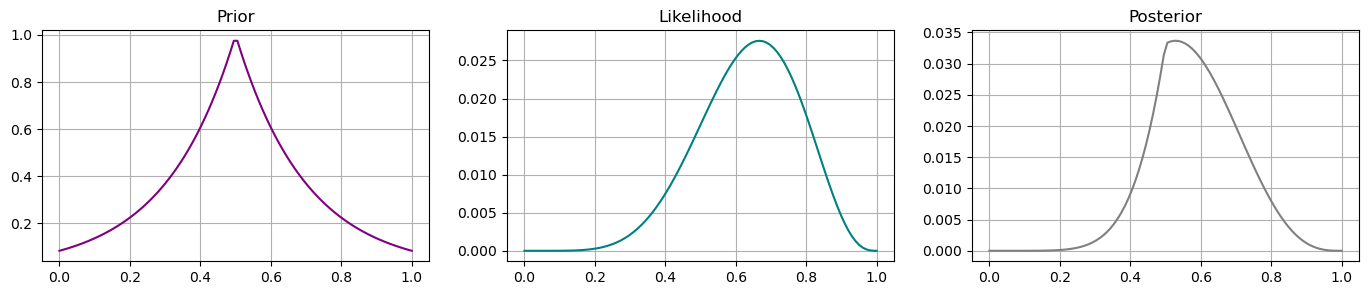

In [15]:
prior3 = jnp.exp(- 5 * abs(p_grid - 0.5))
posterior3 = computePosterior(likelihood_pmf, prior3)

#### Informative or non-informative priors

Choosing a prior is hard!

- Main source of criticism from non-Bayesians is how priors are chosen.
- Priors should be informed by existing knowledge.
- But what if we don't know anything before (prior to) inference?
- Non-informative/informative priors are outside scope of this section, but something to pay attention to when you encounter these models in the wild! 🐅

## How can we perform Bayesin inference?

### What does it take?
- <font color='red'>`Data`</font>
- A generative model (how does the conditional <font color='teal'>`likelihood`</font> come about?)
- Our <font color='purple'>`beliefs`</font> before seeing the data.

### What does it make?
- The values of parameters that could give rise to the observed data **in the form of a distribution**.


### How can we perform it?

- **Analytically**
        
     Solving the maths! This is an elegant approach. However, it is rarely available in real life.

- **Numerically**

    - Rather than deriving a posterior distribution in the closed form, we can use computational tools to **sample** from the posterior. The obtained samples describe the distributions of parameters.
    
    - We achieve this by exploring the space of parameters to find the most probable combinations of parameters.
    
    - Further we treat the obtained sampled as new data, to extract information about parameters, such as mean, credible interval or other statistics.

### Numerical methods

- Markov Chain Monte Carlo (MCMC) family of algorithm, e.g.,
  * Metropolis-Hastings
  * Gibbs
  * Hamiltonian Monte Carlo (HMC)
  * No-U-Turn sampler (NUTS)
  * further variants such as SGHMC, LDHMC, etc
- Variational Bayes
- Approximate Bayesian Computation (ABC)
- Particle filters
- Laplace approximation

More on this later! First, let's discuss some analytics and point estimates.    

## Analytical Bayesian inference: Point estimates for Bernoulli-beta coin flips - [<font color='orange'>`Intermediate`</font>]

### Point estimates

To illustrate the use of Bayes' Theorem further, let's explore the coin flip example that you saw with the Bernoulli distribution to try to figure out whether a coin is weighted or not. 💰

We really just want one answer out of this problem -- the probability that a coin will give us a heads (since we know that the probability of tails is just $1- p(heads)$). This is a <font color='green'>`point estimate`</font>: one answer out of a range.

In machine learning, we are often interested in estimating parameters $\theta$ that best allow us to describe our data. Generally this leads to solving some optimisation problem for a loss function $\mathcal{L}$, i.e.
\begin{equation*}
\hat{\theta} = {\arg \min}_\theta \mathcal{L}(\theta)
\end{equation*}

This gives us a <font color='green'>`point estimate`</font> $\hat{\theta}$.

**Group task 6**: Does a point estimate tell us anything about our uncertainty or the distribution from which we draw the estimate? Discuss the difference between <font color='green'>`point estimates`</font> and estimating a *distribution*.